**Face Recognition Model**

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 107kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a40506f6f683684cef646b13650084bfeebd358b8e8c9762d60577f462cb77a5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


*Feature Extraction*

In [ ]:
ls

 Face_recognition.ipynb
'https___specials-images.forbesimg.com_imageserve_5ec595d45f39760007b05c07_0x0.jpg_background=000000&cropX1=989&cropX2=2480&cropY1=74&cropY2=1564'
 Lionel-Messi.jpg
 messi-ronaldo.jpg
 ronaldo.jpg
 unknown.webp
 Untitled
 zlatan.jpg


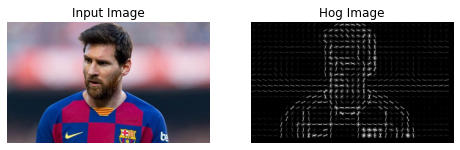

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2

image = cv2.imread("Lionel-Messi.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# plt.imshow(image)

fd,hog_image = hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.set_title('Hog Image')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
plt.show()

In [ ]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle
import numpy as np
import pandas as pd
%matplotlib inline

Face Detection

In [ ]:
faces = face_recognition.face_locations(image)
num_faces = len(faces)

print(f"Num of faces = {num_faces}")

Num of faces = 1


In [ ]:
image2 = cv2.imread("messi-ronaldo.jpg")
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

faces2 = face_recognition.face_locations(image2)
print(f"Num of faces = {len(faces2)}")

Num of faces = 2


In [ ]:
def drawRectangle(image):
  plt.imshow(image)
  ax = plt.gca()
  faces = face_recognition.face_locations(image)

  for face in faces:
    t,r,b,l = face
    x,y,w,h= l,t,r,b
    rect = Rectangle((x,y),w-x,h-y,fill=False,color='blue')
    ax.add_patch(rect)

  plt.show()

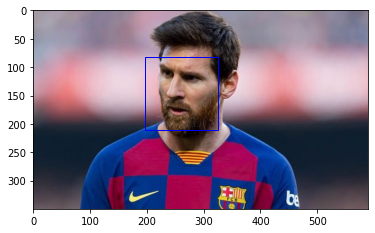

In [ ]:
drawRectangle(image)

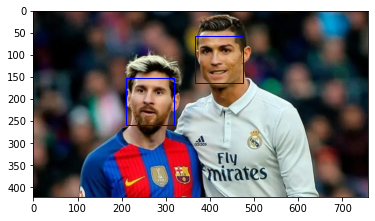

In [ ]:
drawRectangle(image2)

Face Recognition

In [ ]:
import face_recognition as fr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
messi = cv2.imread("Lionel-Messi.jpg")
messi = cv2.cvtColor(messi,cv2.COLOR_BGR2RGB)

ronaldo = cv2.imread("ronaldo.jpg")
ronaldo = cv2.cvtColor(ronaldo,cv2.COLOR_BGR2RGB)

zlatan = cv2.imread("zlatan.jpg")
zlatan = cv2.cvtColor(zlatan,cv2.COLOR_BGR2RGB)


In [ ]:
messi_enc = fr.face_encodings(messi)[0]
ronaldo_enc = fr.face_encodings(ronaldo)[0]
zlatan_enc = fr.face_encodings(zlatan)[0]

Known_LIB = [messi_enc,ronaldo_enc,zlatan_enc]

In [ ]:
from scipy.spatial import distance

def faceRecognition(image,threshold=0.6):
  unknown_enc = fr.face_encodings(image)

  for faces in unknown_enc:

    results = []
    for known_faces in Known_LIB:
      d = distance.euclidean(known_faces,faces)
      results.append(d)
    results = np.array(results)<=threshold

    if results[0]:
      print("Messi found")
    elif results[1]:
      print("Ronaldo found")
    elif results[2]:
      print("Zlatan found")
    else:
      print("Unknown found")


    

Messi found
Ronaldo found


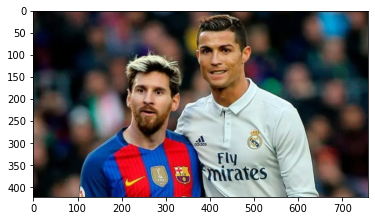

In [ ]:
plt.imshow(image2)
faceRecognition(image2)

Unknown found


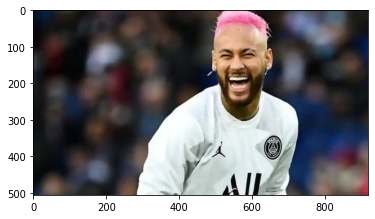

In [ ]:
unk = cv2.imread("unknown.webp")
unk = cv2.cvtColor(unk,cv2.COLOR_BGR2RGB)

plt.imshow(unk)
faceRecognition(unk)

**THANK YOU**